# Indicators of Heavy Traffic on I-94
### Data Visualization

This project will take in a dataset detailing westbound traffic on the I-94 Interstate. Included is information on weather, time of day/week/year, and more. The goal of the prokect is to utilize some simple exploratory data visualization through python libraries matplotlib.pyplot, pandas, and seaborn. 

Let's start by reading in the dataset and looking at the first and last few rows, and the info() function to gain a basic understanding of the data we're working with.

In [1]:
import pandas as pd

highway = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(highway.head(4))
print(highway.tail(4))
print(highway.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_descriptio

Here we can see an overall description. The healthy dataset has almost 50,000 rows, and a straightforward eight columns. Most columns are numeric, which should make working with them easier. The others seem categorical. There are no null values, which is quite useful.

## First Look at Traffic Volume

Let's focus on the main column we are looking for trends in: traffic volume. We can make a simple pandas histogram to see the frequencies that different levels of traffic volume are recorded.

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

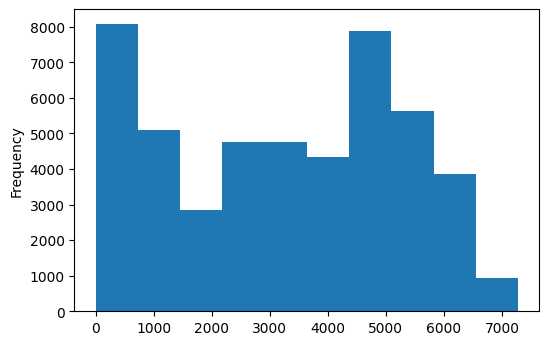

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

highway['traffic_volume'].plot.hist()

highway['traffic_volume'].describe()

From the description of the traffic volume column, we can see that things are relatively evenly distributed, with the mean value coming in at almost the 50th percentile. The mean is also about halfway between the minimum and maximum value.

The histogram shows that there are often times with medium-high traffic, and often times when there is no traffic at all, and less frequently the highest volumes of traffic.

There may be an influence of time of day indicated here, as the first 25 percentiles of counts are likely during red-eye hours in the middle of the night, while the higher ends are likely during rushhour. We can look further into this in our analysis.

## Focusing on Time

A number of factors can likely indicate high traffic. To start, we will look at time.

Let's separate the data into day and night, to see if the spikes in low traffic in the above histogram truly are just night time hours. To start, we convert the date_time column containing info on time into pandas datetime objects.

Then, we split our dataset into two DataFrames. One with hours 7am to 7pm, the other 7pm to 7am. We print the first ten times in each, to show the different hours are separated.

In [3]:
highway['date_time'] = pd.to_datetime(highway['date_time'])
day_hours = highway[(highway['date_time'].dt.hour >= 7) & (highway['date_time'].dt.hour < 19)]
night_hours = highway[(highway['date_time'].dt.hour < 7) | (highway['date_time'].dt.hour >= 19)]

print(day_hours['date_time'].head(10))
print(night_hours['date_time'].head(10))

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
5   2012-10-02 14:00:00
6   2012-10-02 15:00:00
7   2012-10-02 16:00:00
8   2012-10-02 17:00:00
9   2012-10-02 18:00:00
Name: date_time, dtype: datetime64[ns]
10   2012-10-02 19:00:00
11   2012-10-02 20:00:00
12   2012-10-02 21:00:00
13   2012-10-02 22:00:00
14   2012-10-02 23:00:00
15   2012-10-03 00:00:00
16   2012-10-03 01:00:00
17   2012-10-03 02:00:00
18   2012-10-03 03:00:00
19   2012-10-03 04:00:00
Name: date_time, dtype: datetime64[ns]


We can create histograms for the traffic volumes for both the day and night DataFrames. They will show whether or not the time of day correlates with traffic. We can also describe the traffic_volume column for both sets to see some specific statistics.

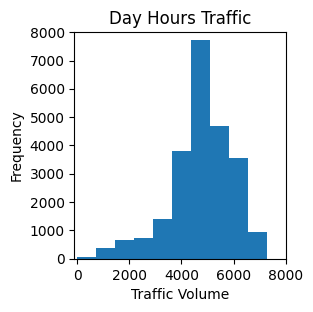

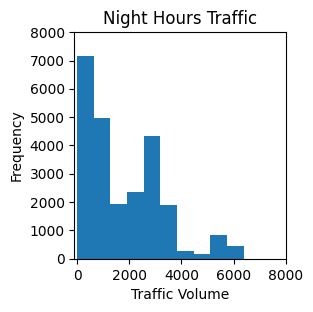

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


In [4]:
plt.figure(figsize = (13,4))
plt.subplot(1, 2, 1)
day_hours['traffic_volume'].plot.hist(figsize = (6,3))
plt.title('Day Hours Traffic')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim([0,8000])
plt.xlim([-100,8000])
plt.show()
plt.subplot(1,2,2)
night_hours['traffic_volume'].plot.hist(figsize = (6,3))
plt.title('Night Hours Traffic')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim([0,8000])
plt.xlim([-100,8000])
plt.show()

print(day_hours['traffic_volume'].describe())
print(night_hours['traffic_volume'].describe())

The day hours histogram has a left skew, while the night hours histogram has a right skew. These opposite shapes suggest that our hypothesis was correct - lower traffic is at night while higher traffic is during the day.

We can see the specifics in the descriptions. The 75th percentile of traffic volume at night is 2,819 cars. The 25th percentile for day traffic is 4,252. So 75% of the instances during night hours have significantly less traffic volume than even just the lowest 25% of day time instances.

At this point, as the goal is to find reasons for high traffic, we can discount the night data and focus on the day data, to see factors besides time.

#### Months
So what now? Well let's continue looking at time, but rather than simply day and night we will look at day of the week, month, and time of day. Let's begin with month.

<ipython-input-5-9bda6165ccf8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



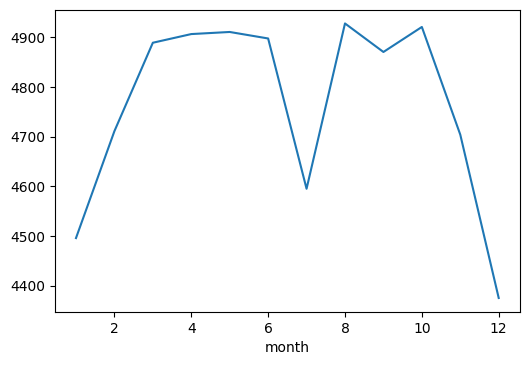

In [5]:
day_hours['month'] = day_hours['date_time'].dt.month
by_month = day_hours.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

We can see traffix is relatively consistent, except for noticeable drops in January and December, and smaller drops in February, July and November. The drops from November until February make sense as they are the coldest months of the year. July however stands out, and may need to be investigated further.

#### Day of the Week

We first need to find the average traffic volume for each day of the week, using a nearly identical method as with the months.

<ipython-input-6-8ce3de4acb5b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



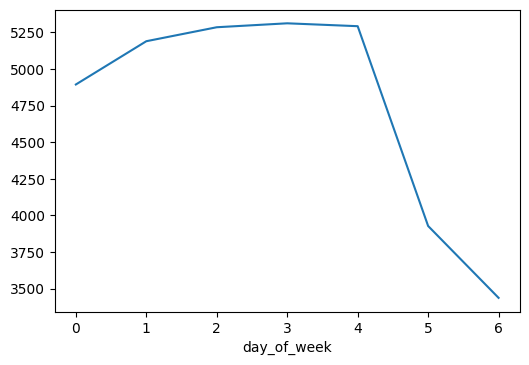

In [6]:
day_hours['day_of_week'] = day_hours['date_time'].dt.dayofweek
by_dayofweek = day_hours.groupby('day_of_week').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

We can see from this graph that traffic volume is lower on day 5 and 6, which is likely Saturday and Sunday if the day count begins at Monday being 0. This makes sense, as the weekend days do not have commuters travelling to work, so there is less traffic than the business days. The weekdays (Mon-Fri) average around 4,982 cars per instance, and weekends (Sat-Sun) average 3,437 cars per instance.

#### Time of Day

Let's start looking at the hours within the daytime hours. So the 12 hours from 7am to 7pm. We need to split the dataset into two, business days and workdays, as the different patterns by hour will be striking, as business days have rush hour. 

<ipython-input-7-c22c4b9f8d92>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



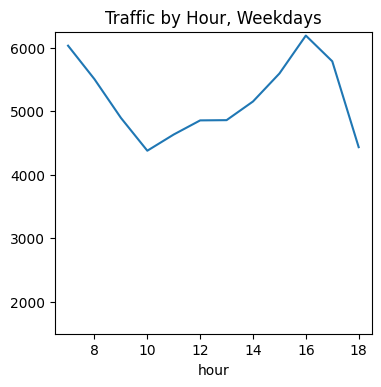

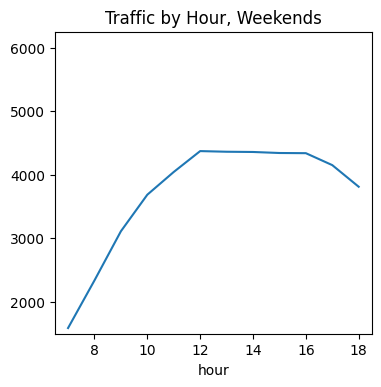

In [7]:
day_hours['hour'] = day_hours['date_time'].dt.hour
business_days = day_hours[day_hours['day_of_week'] < 5]
weekend = day_hours[day_hours['day_of_week'] >= 5]

by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize = (18,4))
plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line(figsize = (9,4))
plt.title('Traffic by Hour, Weekdays')
plt.xlim([6.5,18.5])
plt.ylim([1500,6250])
plt.show()
plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line(figsize = (9,4))
plt.title('Traffic by Hour, Weekends')
plt.xlim([6.5,18.5])
plt.ylim([1500,6250])
plt.show()

We can see expected differences between the weekdays and weekends. The business days have a near peak in the morning around hour 7, in what must be rush hour. In contrast, on weekends hour 7 is the lowest volume of traffic of all the daytime hours. It gradually goes up until leveling off from the afternoon into the evening, while the weekdays spike during the morning rush hour, go down, and then spike again during the end of the work day, at hour 16. (4 p.m.).

Overall, traffic volume is highest during the warm months, on the weekdays, during the daytime, specifically around rushhour at the beginning and end of the workday. These peaks all make intuitive sense, and are confirmed by all the graphs created.

## Weather and Traffic

Now that we've investigated the times at which traffic is the most promient, we should look for other factors, namely weather based ones. Luckily, the dataset provides many numerical columns about weather, including temperature, rainfall, and snowfall.

Let's see if there's any correlation between traffic volume and these numerical weather columns.

In [8]:
day_hours.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
day_of_week      -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

In the above correlations we can immediately dismiss the time columns we already looked at. Though the correlations with the weather columns don't seem too promising. The highest is teperature, at +0.128. We can graph a scatter plot to see if there seems to be any visible connection.

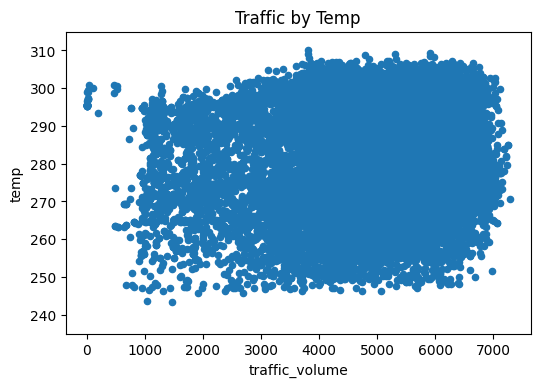

In [9]:
day_hours.plot.scatter(x = 'traffic_volume', y = 'temp')
plt.title('Traffic by Temp')
plt.ylim([235,315]) #Removes two anomalous temperatures, likely errors.
plt.show()

From the above scatterplot... little takeaways can be had. It seems none of our numeric weather columns, including temperature, is a reliable indicator for heavy traffic. Any correlation that does exist likely is based around the lower traffic during colder months found in November to February in an earlier part of the project.

That said, there are categorical weather columns, weather_main and weather_description we can still look at to see any potential visible correlation.

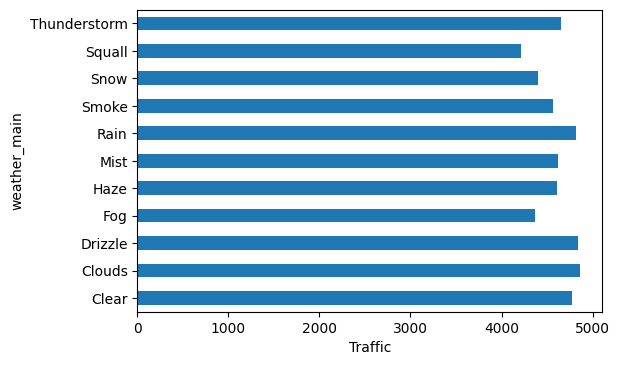

In [10]:
by_weather_main = day_hours.groupby('weather_main').mean()
by_weather_description = day_hours.groupby('weather_description').mean()

by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Traffic')
plt.show()

None of the above weather indicators seem to be too heavy of indicators for traffic. Fog seems to yield slightly less traffic, which makes sense as drivers prefer to not drive in fog, but even then it is by a marginal amount. None of the potential indicators exceed 5,000 cars. 

Let's try the weather description then.

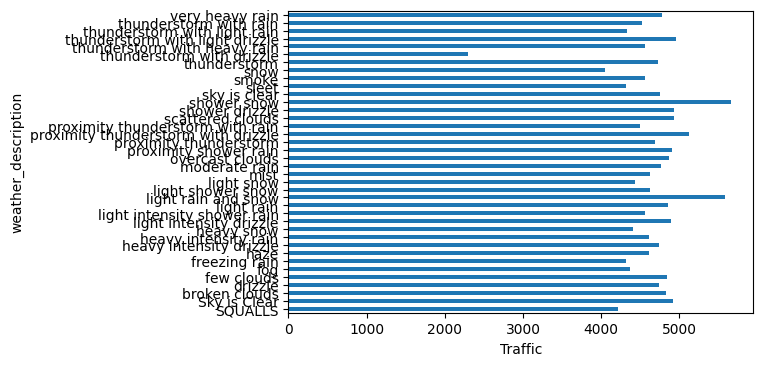

<Figure size 500x1000 with 0 Axes>

In [18]:
by_weather_description['traffic_volume'].plot.barh()
plt.xlabel('Traffic')
plt.figure(figsize = (5,10))
plt.show()

Three weather factors seem to exceed 5,000 cars. These are 'Shower snow', 'Light rain and snow', and 'Proximity thunderstorm with drizzle'. These are all poor weather consitions, but not as poor as some of the other conditions in the dataset. This may be because in poor weather people prefer to drive rather than not, but in extremely poor weather people don't bother leaving the house. Alternatively, this data is just relatively anomalous. 

## Conclusions

In this project, we investigated potential factors, both temporal and weather-based, on traffic volume on the I-94 highway. As far as time went, we made some good findings:
* Wintery/Cold months have less traffic
* Weekdays have more traffic than weekends
* Daytime hours have more traffic than nighttime
* Rushhour traffic, 7am and 4pm, have the most traffic.

For weather factors, there seemed to be less correlation to traffic volume. That said, some types of weather seemed to yield more traffic:
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

Overall, the project gave a good overview of how to use pandas and patplotlib to use exploratory data visualization.

In the future, the graphs used in this project could be edited to be more stramline and visually appealing, considering as they currently stand they are difficult to read. As this is exploratory analysis rather than explanatory though, this is acceptable. Final visualizations are likely to be done in Tableau or Power BI.